In [1]:
import cv2
import imutils
import imutils.perspective as persp
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
import numpy as np
import os

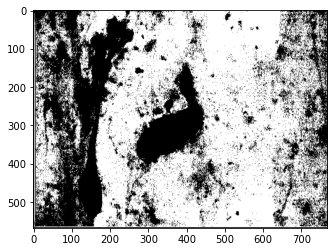

In [30]:

image = cv2.imread("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Cancerous cell smears/cyl01.bmp",0)
#image_gray = cv2.imread("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/GrayscaleImages/cyl1.bmp")


thresh, thresh_img = cv2.threshold(image,160,255,cv2.THRESH_BINARY)
thresh, thresh_img1 = cv2.threshold(image,160,255,cv2.THRESH_BINARY_INV)
rgb_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)


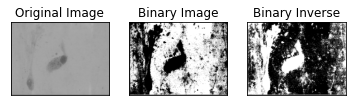

In [31]:
titles = ['Original Image', 'Binary Image', 'Binary Inverse']
images = [image_gray, thresh_img, thresh_img1]

for i in range(3):
    plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
    


In [33]:
contours, heirarchy = cv2.findContours(thresh_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)



In [34]:
largest_areas = sorted(contours, key=cv2.contourArea)

In [35]:
mask = np.zeros(image.shape, np.uint8)

In [36]:
img_contour = cv2.drawContours(mask,[largest_areas[-1]],0,(255,255,255),-1)


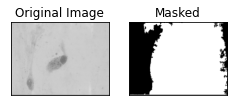

In [37]:
titles = ['Original Image', 'Masked']
images = [image, img_contour]

for i in range(2):
    plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

In [38]:
adap_thresh = cv2.adaptiveThreshold(image, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)


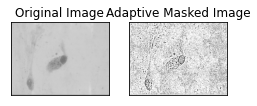

In [39]:
titles = ['Original Image', 'Adaptive Masked Image']
images = [image, adap_thresh]

for i in range(2):
    plt.subplot(2,3,i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

In [ ]:
contours, heirarchy = cv2.findContours(adap_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
largest_areas = sorted(contours, key=cv2.contourArea)
mask = np.zeros(image.shape, np.uint8)


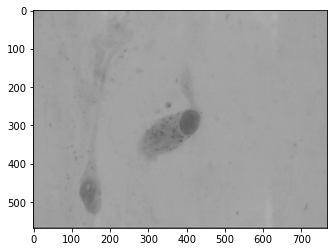

In [139]:
image2 = cv2.imread("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Cancerous cell smears/cyl01.bmp")
#image2 = cv2.imread("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Cancerous cell smears/cyl02.bmp")
grayImage = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
rgb_img = cv2.cvtColor(grayImage, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)



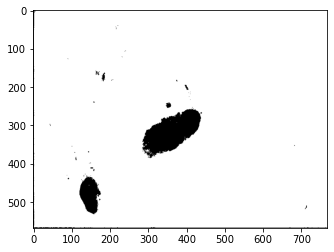

In [140]:
thresh, thresh_img = cv2.threshold(grayImage,140,255,cv2.THRESH_BINARY)
rgb_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)


In [141]:
conts = cv2.findContours(thresh_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
conts = imutils.grab_contours(conts)
print(len(conts))

110


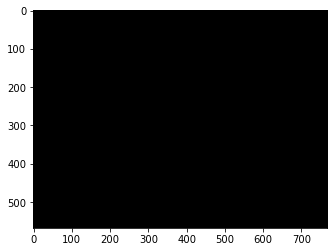

In [142]:
cont_img = np.zeros(image2.shape)
plt.imshow(cont_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


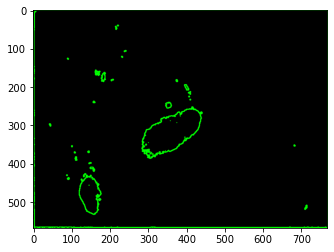

In [143]:
cont_img = cv2.drawContours(cont_img, conts, -1, (0,255,0), 2)
plt.imshow(cont_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


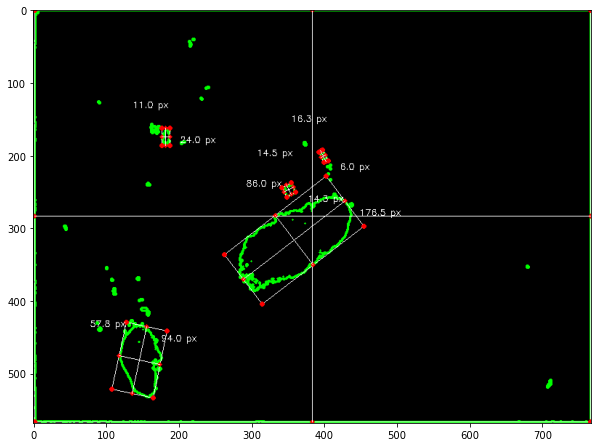

In [151]:
cont_img = cv2.drawContours(cont_img, conts, -1, (0,255,0), 2)
cont_image_copy = np.copy(cont_img)

def midPoint(ptA, ptB):
    return ((ptA[0]+ptB[0])/2, (ptA[1]+ptB[1])/2)

for c in conts:
    box = cv2.minAreaRect(c)
    box = cv2.boxPoints(box)
    box = np.array(box, dtype='int')
    
    
    if cv2.contourArea(c) < 50:
        continue
    
    cv2.drawContours(cont_img, [c], -1, (0,255,0), 2)
    cv2.drawContours(cont_image_copy, [box], -1, (255,255,255), 1)
    
    for (x,y) in box:
        cv2.circle(cont_image_copy, (x, y), 2, (255,0,0), 2)
        (tl,tr,br,bl) = box
        
        #top and bottom midpoints
        (tlX, trX) = midPoint(tl, tr)
        (brX, blX) = midPoint(br, bl)
        
        #midpoint dots
        cv2.circle(cont_image_copy, (int(tlX), int(trX)), 1, (255,0,0), 3)
        cv2.circle(cont_image_copy, (int(brX), int(blX)), 1, (255,0,0), 3)
        
        cv2.line(cont_image_copy, (int(tlX), int(trX)), (int(brX), int(blX)), (255,255,255), 1)
        
        dA = dist.euclidean((tlX, trX), (brX, blX))
        
        #print size of each contour
        cv2.putText(cont_image_copy, "{:.1f} px".format(dA), (int(tlX-40), int(trX-40)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1)
        
        
        #left and right midpoints
        (tlX, trX) = midPoint(tl, bl)
        (brX, blX) = midPoint(tr, br)
        
        #left and right dots
        cv2.circle(cont_image_copy, (int(tlX), int(trX)), 1, (255,0,0), 3)
        cv2.circle(cont_image_copy, (int(brX), int(blX)), 1, (255,0,0), 3)
        
        cv2.line(cont_image_copy, (int(tlX), int(trX)), (int(brX), int(blX)), (255,255,255), 1)
        
        #calulate distance (midpoints)
        dB = dist.euclidean((tlX, trX), (brX, blX))
        
        #print size of each contour
        cv2.putText(cont_image_copy, "{:.1f} px".format(dB), (int(brX+20), int(blX+20)), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1)

plt.figure(figsize=(10,10))
plt.imshow(cont_image_copy)
